In [34]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Activation, 
                                     Flatten, Dense, Dropout, BatchNormalization)

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [35]:
dataset_path ="/kaggle/input/oral-cancer/dataset"
batch_size = 32
img_size = (224, 224)
channels = 3
input_shape = img_size + (channels,)

In [36]:
tr_gen = ImageDataGenerator(rescale=1.0 / 255)
val_gen = ImageDataGenerator(rescale=1.0 / 255)
ts_gen = ImageDataGenerator(rescale=1.0 / 255)

train_gen = tr_gen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=True,
)

val_gen = val_gen.flow_from_directory(
    os.path.join(dataset_path, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=True,
)

test_gen = ts_gen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    shuffle=False,
)

Found 3633 images belonging to 2 classes.
Found 519 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, MaxPooling2D, Activation,
    Dropout, GlobalAveragePooling2D, Dense
)
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))  # Lower dropout to retain features

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolutional Block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 5th Convolutional Block (Added for more depth)
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Replacing Flatten with GlobalAveragePooling
model.add(GlobalAveragePooling2D())

# Fully Connected Layer
model.add(Dense(256))  # Increased neurons
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_55 (Activation)           │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_56               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_56 (Activation)           │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_57               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_57 (Activation)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_58               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_58 (Activation)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_59               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_59 (Activation)           │ (None, 56, 56, 128)         │              

 Total params: 2,639,009 (10.07 MB)

 Trainable params: 2,635,297 (10.05 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history=model.fit(train_gen, validation_data=val_gen, epochs=10,callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 73s 523ms/step - accuracy: 0.6441 - loss: 0.6492 - val_accuracy: 0.4798 - val_loss: 2.0162
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 49s 423ms/step - accuracy: 0.7261 - loss: 0.5390 - val_accuracy: 0.4798 - val_loss: 4.3990
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 432ms/step - accuracy: 0.7765 - loss: 0.4700 - val_accuracy: 0.4798 - val_loss: 1.9108
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 49s 424ms/step - accuracy: 0.7842 - loss: 0.4653 - val_accuracy: 0.5800 - val_loss: 1.2061
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 431ms/step - accuracy: 0.7942 - loss: 0.4436 - val_accuracy: 0.5145 - val_loss: 2.6131
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 429ms/step - accuracy: 0.8142 - loss: 0.4216 - val_accuracy: 0.7091 - val_loss: 0.7235
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 430ms/step - accuracy: 0.8287 - loss: 0.3947 - val_accuracy: 0.7495 - val_loss: 0.7008
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 50s 427ms/step - accuracy: 0.8301 - loss: 0.3798 - val

In [41]:
def evaluate_model(model, train_gen, val_gen, test_gen, history):
    train_res = model.evaluate(train_gen)
    train_accuracy = train_res[1]
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    
    val_res = model.evaluate(val_gen)
    val_accuracy = val_res[1]
    print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
    
    test_res = model.evaluate(test_gen)
    test_accuracy = test_res[1]
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    y_true = test_gen.classes
    y_pred_prob = model.predict(test_gen)
    
    if y_pred_prob.shape[1] > 1:
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=test_gen.class_indices.keys(), 
                yticklabels=test_gen.class_indices.keys())
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=test_gen.class_indices.keys()))
    
    if history is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(history.history.get('loss', []), label='Train Loss', marker='o')
        plt.plot(history.history.get('val_loss', []), label='Validation Loss', marker='s')
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid()
        plt.show()
    
    if y_pred_prob.shape[1] == 1:
        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(loc="lower right")
        plt.show()


114/114 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.8561 - loss: 0.3363
Training Accuracy: 85.66%
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8214 - loss: 0.4624
Validation Accuracy: 81.31%
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 874ms/step - accuracy: 0.9242 - loss: 0.2198
Test Accuracy: 90.00%
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 858ms/step


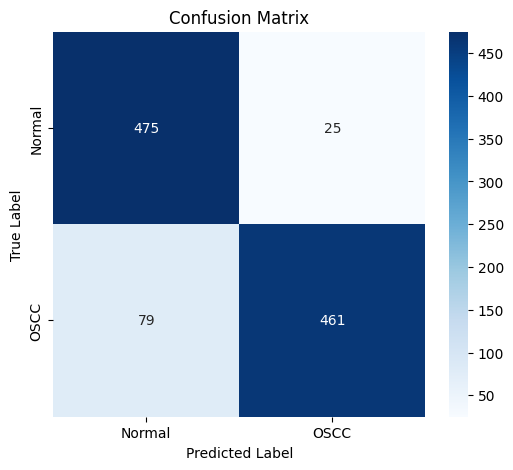

Classification Report:
               precision    recall  f1-score   support

      Normal       0.86      0.95      0.90       500
        OSCC       0.95      0.85      0.90       540

    accuracy                           0.90      1040
   macro avg       0.90      0.90      0.90      1040
weighted avg       0.90      0.90      0.90      1040



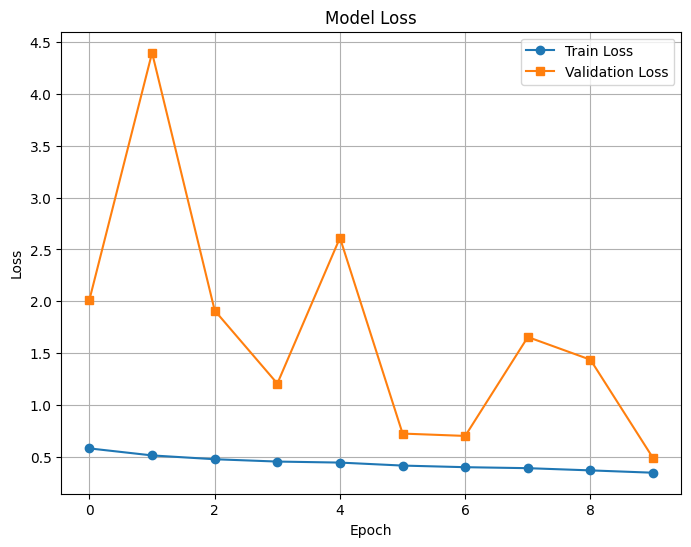

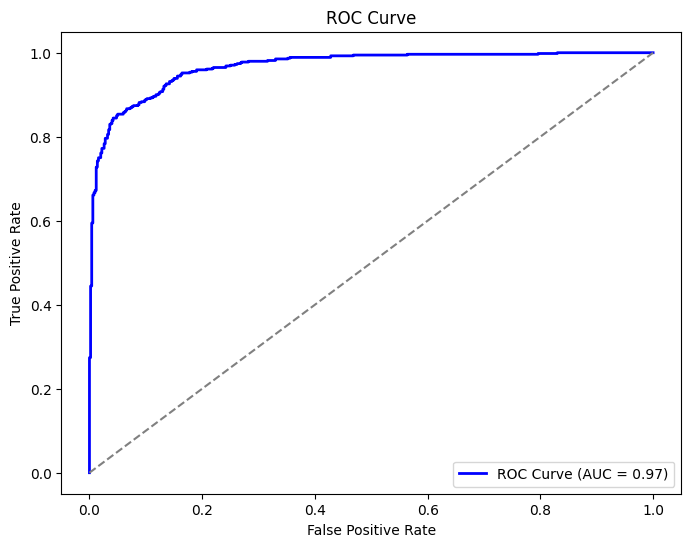

In [42]:
import seaborn as sns
evaluate_model(model, train_gen, val_gen, test_gen, history)

In [43]:
model.save("CNN.keras")
print("Model saved as own_CNN.keras")

Model saved as own_CNN.keras
